In [23]:
import pandas as pd
import re

In [24]:
df = pd.read_csv("../../data/crash trends_1981-2021.csv")

In [25]:
df

,Year,Crashes,Casuality,Fatalities,Reg. Vehicles,Estimated pop
0,198,1715,940,93,34698.0,941027.0
1,1982,2648,1614,130,38451.0,975625.0
2,1983,2205,1251,176,42479.0,101138.0
3,1984,3300,1799,168,47192.0,104845.0
4,1985,3521,2369,198,51678.0,1086139.0
5,1986,4983,1448,182,55604.0,1125008.0
6,1987,4515,1746,191,57705.0,1164893.0
7,1988,5741h,"2923,",262,64301.0,1205834.0
8,1989,6299,4136,295,70030.0,1247771.0
9,1990,7614,4845,314,80953.0,1290642.0


In [26]:
df.shape


(41, 6)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           41 non-null     object 
 1   Crashes        41 non-null     object 
 2   Casuality      41 non-null     object 
 3   Fatalities     41 non-null     int64  
 4   Reg. Vehicles  37 non-null     float64
 5   Estimated pop  40 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ KB


In [28]:
#lower all columns and remove white spaces
df.columns = df.columns.str.lower().str.replace(' ', '_')


In [29]:
df = df.rename(columns={'reg._vehicles': 'registered_vehicles'})

In [30]:
df.head()

,year,crashes,casuality,fatalities,registered_vehicles,estimated_pop
0,198,1715,940,93,34698.0,941027.0
1,1982,2648,1614,130,38451.0,975625.0
2,1983,2205,1251,176,42479.0,101138.0
3,1984,3300,1799,168,47192.0,104845.0
4,1985,3521,2369,198,51678.0,1086139.0


In [31]:
#remove all non-numeric characters from the entire df
df = df.replace(r'\D','', regex=True)

In [32]:
#complete 1981
df['year'] = df['year'].replace('198', '1981')

In [33]:
df.head()

,year,crashes,casuality,fatalities,registered_vehicles,estimated_pop
0,1981,1715,940,93,34698.0,941027.0
1,1982,2648,1614,130,38451.0,975625.0
2,1983,2205,1251,176,42479.0,101138.0
3,1984,3300,1799,168,47192.0,104845.0
4,1985,3521,2369,198,51678.0,1086139.0


In [51]:
df['crashes'] = df['crashes'].astype(int)
df['casuality'] = df['casuality'].astype(int)
df['year'] = pd.to_datetime(df['year'])
df['registered_vehicles'] = df['registered_vehicles'].replace([np.inf, -np.inf, np.nan], 0).astype(int)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   year                 41 non-null     datetime64[ns]
 1   crashes              41 non-null     int64         
 2   casuality            41 non-null     int64         
 3   fatalities           41 non-null     int64         
 4   registered_vehicles  37 non-null     float64       
 5   estimated_pop        40 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 2.0 KB


## Missing Values


In [37]:
print(f'There are {df.isna().sum().sum()} missing values in the entire dataset.')

There are 5 missing values in the entire dataset.


In [38]:
#sum of misssing values per column
df.isna().sum()

year                   0
crashes                0
casuality              0
fatalities             0
registered_vehicles    4
estimated_pop          1
dtype: int64

In [39]:
## percentage of missing values
df.isnull().sum().sort_values(ascending=False) / len(df) * 100

registered_vehicles    9.756098
estimated_pop          2.439024
year                   0.000000
crashes                0.000000
casuality              0.000000
fatalities             0.000000
dtype: float64

In [42]:
import missingno

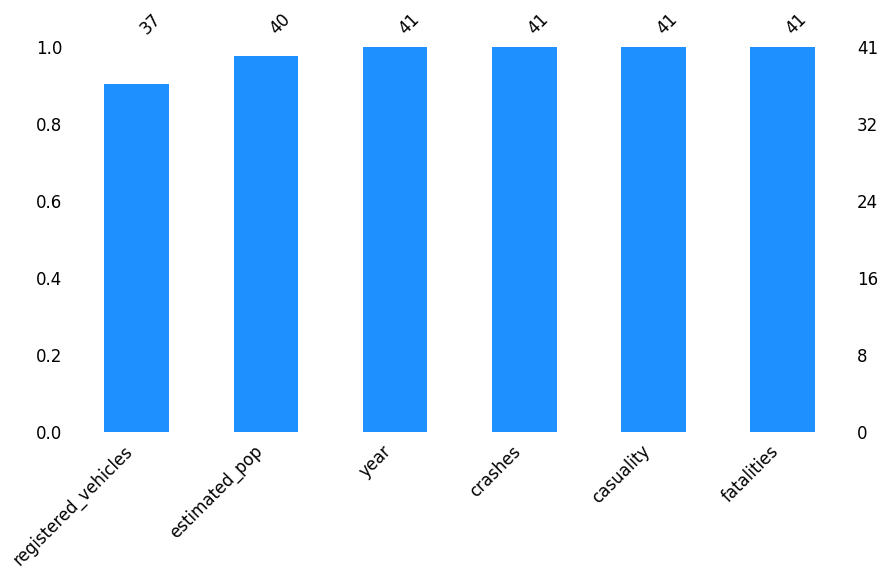

In [45]:
mis = missingno.bar(df, figsize=(10,5),color="dodgerblue", sort="ascending", fontsize=12);

In [46]:
# Check sum of zero values
zeros = (df[['registered_vehicles','estimated_pop','year','crashes', 'casuality', 'fatalities' ]] == 0).sum()
zeros

registered_vehicles    0
estimated_pop          0
year                   0
crashes                0
casuality              0
fatalities             0
dtype: int64

In [53]:
df.registered_vehicles.median()

149639.0

In [55]:
veh_mean = df.registered_vehicles.mean()
df.registered_vehicles.fillna(veh_mean).astype(int)

0      34698
1      38451
2      42479
3      47192
4      51678
5      55604
6      57705
7      64301
8      70030
9      80953
10     83048
11     90405
12     94440
13    108048
14    117733
15    128292
16    133691
17    139839
18    149639
19    154000
20    166405
21    186865
22    204228
23    225182
24    246681
25    277117
26    293755
27    329270
28    359223
29    394401
30    430594
31    473530
32    515270
33    556737
34    602822
35    653274
36    649519
37    224516
38    224516
39    224516
40    224516
Name: registered_vehicles, dtype: int64

In [54]:
df.describe()

,year,crashes,casuality,fatalities,registered_vehicles,estimated_pop
count,41,41.000000,41.000000,41.000000,37.000000,4.000000e+01
mean,2000-12-31 15:13:10.243902464,13041.390244,5468.390244,380.902439,224516.189189,1.593064e+06
min,1981-01-01 00:00:00,1715.000000,940.000000,93.000000,34698.000000,1.011380e+05
25%,1991-01-01 00:00:00,8381.000000,4871.000000,325.000000,80953.000000,1.317758e+06
50%,2001-01-01 00:00:00,16641.000000,6035.000000,411.000000,149639.000000,1.632234e+06
75%,2011-01-01 00:00:00,17786.000000,6952.000000,457.000000,329270.000000,1.986114e+06
max,2021-01-01 00:00:00,20415.000000,8160.000000,557.000000,653274.000000,2.374698e+06
std,NaN,6028.255896,2149.042192,120.358590,188926.162983,5.218203e+05


In [58]:
pop = df.estimated_pop.mean()
df.estimated_pop.fillna(pop).astype(int)

0      941027
1      975625
2      101138
3      104845
4     1086139
5     1125008
6     1164893
7     1205834
8     1247771
9     1290642
10    1326796
11    1378993
12    1424502
13    1458690
14    1493699
15    1529548
16    1546725
17    1598610
18    1603847
19    1642339
20    1622129
21    1649659
22    1973184
23    1692731
24    1708327
25    1719996
26    1736396
27    1755246
28    1776494
29    1800098
30    2024904
31    2066406
32    2107484
33    2147906
34    2187477
35    2226040
36    2264993
37    2302878
38    2338851
39    2374698
40    1593064
Name: estimated_pop, dtype: int64

In [59]:
df.to_csv('../../data/preprocessed_data/crash_trends_1981-2021.csv')